# The Deutsch-Jozsa Algorithm

The Deutsch-Jozsa algorithm is a significant quantum algorithm that demonstrates the power of quantum computing over classical computing. It was one of the first examples to show that a quantum computer could solve certain problems exponentially faster than a classical computer. 
<hr>

### Problem Definition
The Deutsch-Jozsa algorithm addresses the problem of determining whether a given function $ f: \{0, 1\}^n \rightarrow \{0, 1\} $ is constant or balanced:
- **Constant Function**: The function returns the same value (either 0 or 1) for all possible inputs.
- **Balanced Function**: The function returns 0 for exactly half of the inputs and 1 for the other half.

In classical computing, determining whether a function is constant or balanced might require evaluating the function up to $ 2^{n-1} + 1 $ times in the worst case. The Deutsch-Jozsa algorithm solves this problem with only one evaluation of the function using a quantum computer.

### Classical Approach Code 

Constant Function Test:
The function is: Constant


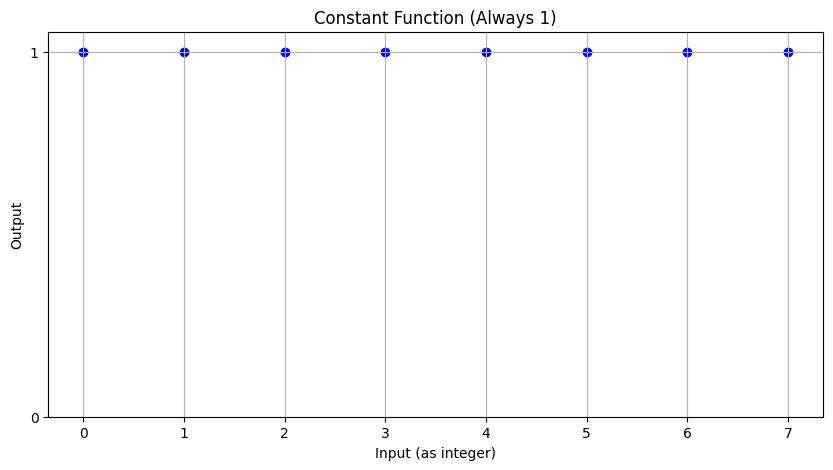


Balanced Function Test:
The function is: Balanced


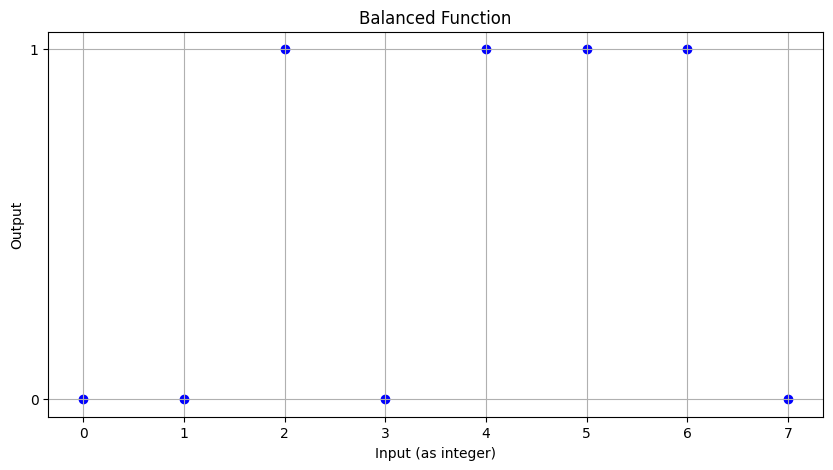

In [2]:
import random
import matplotlib.pyplot as plt

def generate_n_bit_inputs(n):
    """Generate all possible n-bit inputs."""
    return [bin(i)[2:].zfill(n) for i in range(2**n)]

def constant_function(value):
    """Returns a constant function that always returns the given value."""
    return lambda x: value

def balanced_function(n):
    """Returns a balanced function for n-bit inputs."""
    inputs = generate_n_bit_inputs(n)
    half = len(inputs) // 2
    random.shuffle(inputs)
    lookup = {x: 0 if i < half else 1 for i, x in enumerate(inputs)}
    return lambda x: lookup[x]

def determine_function_type(f, n):
    """Determine if the function f is constant or balanced."""
    inputs = generate_n_bit_inputs(n)
    outputs = [f(x) for x in inputs]
    unique_outputs = set(outputs)
    if len(unique_outputs) == 1:
        return "Constant"
    elif outputs.count(0) == outputs.count(1):
        return "Balanced"
    else:
        return "Unknown"

def plot_function(f, n, title):
    """Plot the function outputs for all n-bit inputs."""
    inputs = generate_n_bit_inputs(n)
    outputs = [f(x) for x in inputs]
    
    # Convert binary inputs to integers for plotting
    x = [int(i, 2) for i in inputs]
    y = outputs
    
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, c='blue')
    plt.title(title)
    plt.xlabel('Input (as integer)')
    plt.ylabel('Output')
    plt.xticks(range(2**n))
    plt.yticks([0, 1])
    plt.grid(True)
    plt.show()

# Define n
n = 3

# Create a constant function that always returns 1
const_func = constant_function(1)
print("Constant Function Test:")
print(f"The function is: {determine_function_type(const_func, n)}")
plot_function(const_func, n, "Constant Function (Always 1)")

# Create a balanced function for n-bit inputs
bal_func = balanced_function(n)
print("\nBalanced Function Test:")
print(f"The function is: {determine_function_type(bal_func, n)}")
plot_function(bal_func, n, "Balanced Function")




### Steps of the Deutsch-Jozsa Algorithm

1. **Initialization**:
   - Prepare $ n $ qubits in the state $ |0\rangle^{\otimes n} $ and an ancillary qubit in the state $ |1\rangle $. The initial state of the system is:
     $
     |0\rangle^{\otimes n} \otimes |1\rangle
     $
   - Apply a Hadamard gate to each of the \( n \) qubits and the ancillary qubit. The Hadamard transformation changes the state to:
     $
     \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}
     $

2. **Oracle Query**:
   - Apply the oracle $ U_f $ that implements the function $ f $. The oracle flips the phase of the ancillary qubit depending on the value of $ f(x) $:
     $
     U_f |x\rangle \otimes |y\rangle = |x\rangle \otimes |y \oplus f(x)\rangle
     $
   - After applying the oracle, the state of the system is:
     $
     \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} |x\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}
     $
   - The ancillary qubit is in a superposition, so it can be ignored, leaving the state:
     $
     \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} |x\rangle
     $

3. **Interference**:
   - Apply a Hadamard transformation to each of the \( n \) qubits again. The Hadamard transform on a single qubit is:
     $
     H |x\rangle = \frac{1}{\sqrt{2}} \sum_{z=0}^{1} (-1)^{xz} |z\rangle
     $
   - For \( n \) qubits, the Hadamard transform is:
     $
     H^{\otimes n} |x\rangle = \frac{1}{\sqrt{2^n}} \sum_{z=0}^{2^n-1} (-1)^{x \cdot z} |z\rangle
     $
   - Applying this to the superposition state:
     $
     \frac{1}{2^n} \sum_{z=0}^{2^n-1} \sum_{x=0}^{2^n-1} (-1)^{f(x) + x \cdot z} |z\rangle
     $

4. **Measurement**:
   - Measure the $ n $ qubits. The probability of measuring the state $ |0\rangle^{\otimes n} $ (all zeros) depends on whether $ f(x) $ is constant or balanced:
     - If $ f(x) $ is constant, the amplitude of $ |0\rangle^{\otimes n} $ is 1, meaning we will always measure $ |0\rangle^{\otimes n} $.
     - If $ f(x) $ is balanced, the amplitudes of the states interfere destructively, and the probability of measuring $ |0\rangle^{\otimes n} $ is 0.

### Result
By measuring the final state:
- If the result is $ |0\rangle^{\otimes n} $, the function $ f $ is constant.
- If the result is any other state, the function $ f $ is balanced.


### References
- Deutsch, D., & Jozsa, R. (1992). Rapid solution of problems by quantum computation. Proceedings of the Royal Society of London. Series A: Mathematical and Physical Sciences, 439(1907), 553-558.
- Nielsen, M. A., & Chuang, I. L. (2002). Quantum Computation and Quantum Information. Cambridge University Press.

In [3]:
# useful additional packages 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import BasicAer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.compiler import transpile
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [9]:
n = 13 # the length of the first register for querying the oracle 


In [10]:
# Choose a type of oracle at random. With probability half it is constant, 
# and with the same probability it is balanced
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n) # this is a hidden parameter for balanced oracle. 

# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n+1) #all qubits are initialized to zero
# for recording the measurement on the first register
cr = ClassicalRegister(n)

circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
for i in range(n):
    djCircuit.h(qr[i])

# Flip the second register and apply the Hadamard gate.
djCircuit.x(qr[n])
djCircuit.h(qr[n])
    
# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

if oracleType == 0:#If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.id(qr[n])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])
        
# Apply barrier to mark the end of the oracle
djCircuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    djCircuit.h(qr[i])
    
# Measurement
djCircuit.barrier()
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

The oracle returns a constant value  1


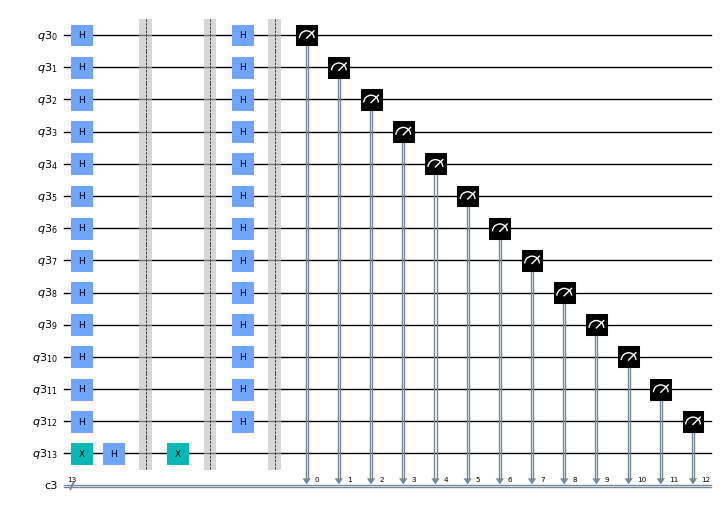

In [11]:
#draw the circuit
djCircuit.draw(output='mpl',scale=0.5)

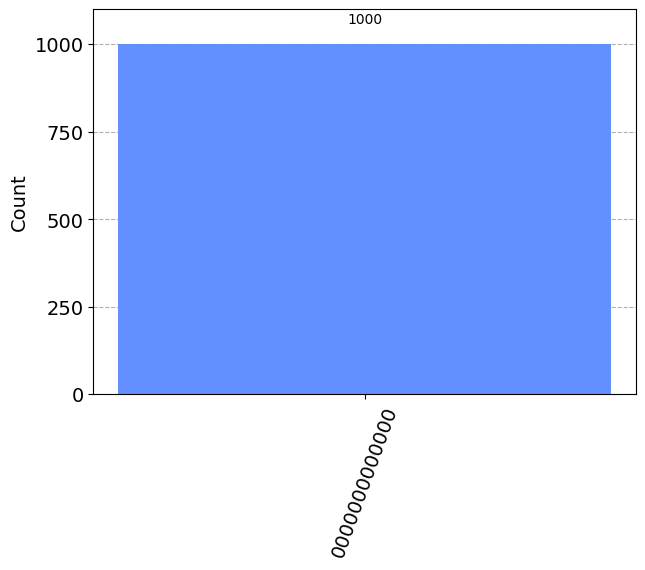

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000
job = execute(djCircuit, backend=backend, shots=shots)
results = job.result() 
answer = results.get_counts()

plot_histogram(answer)